# Convolutional Neural Network

### Importing the libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf.__version__

'2.13.0'

<h3> Getting Label Encoding from Keras </h3>

Found 3000 files belonging to 2 classes.


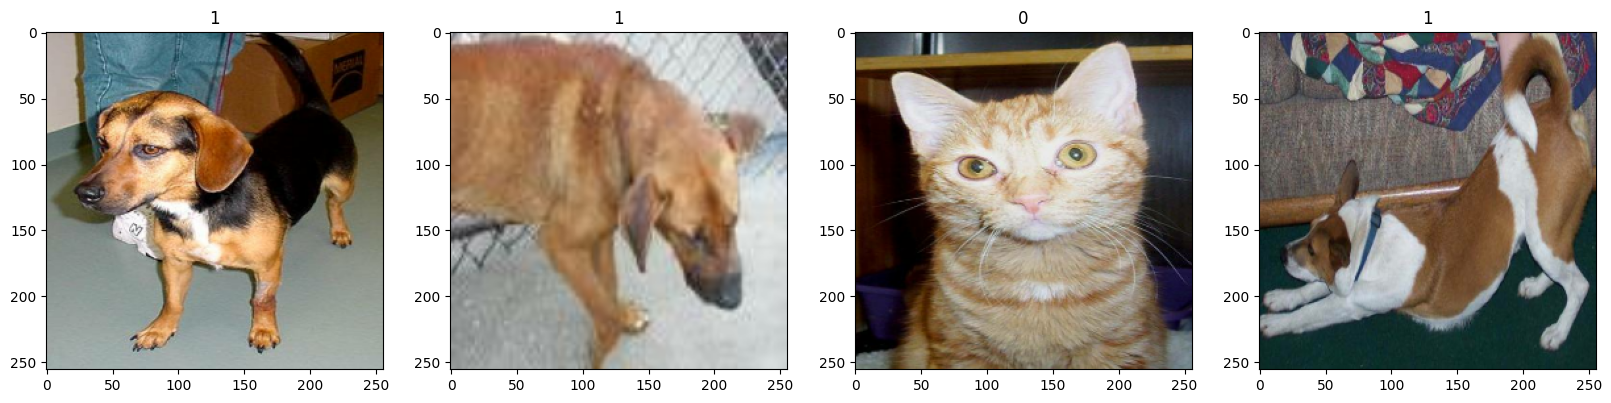

In [3]:
data = tf.keras.utils.image_dataset_from_directory('dataset/training_set')

data_iterator = data.as_numpy_iterator()

batch = data_iterator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Data Preprocessing

### Preprocessing the Training set

In [4]:
#train_datagen is an object that is created.

train_datagen = ImageDataGenerator(
    rescale=1./255,      #feature scaling, so that each pixel is now between 0 and 1. It's basically normalization, and reduce the size of pixel. 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#after train_datagen is created, use the object to call flow_from_directory method to apply the feature scaling to the images in the directory
#at the same time, creating these batches and resizing the image to make it less computationally heavy

train_generator = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 3000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
#apply normalization to test_images as well. 

test_datagen = ImageDataGenerator(rescale=1./255)
 
#import test set into the notebook and apply above logic, batches.. resizing.. 

validation_generator = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


## Building the CNN

### Initialising the CNN

In [6]:
cnn = tf.keras.models.Sequential()

### Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#64,64 as we have already pre-processing the images to pixel 64 by 64 to reduce size and computation
#3 as it is a rgb image, if its b/w then it will be 1
#kernel_size is 3 as we are convoluting it 3 by 3.

### Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#pool size is 2 as we are pooling 2 by 2, and each time the pooling moves by 2 axis to the right. 

### Adding a second convolutional layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))   # no longer have to put the input shape, only first layer.
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Flattening

In [10]:
cnn.add(tf.keras.layers.Flatten())   #flatten the pool image so that it become 1d vector to be used as input layer

### Full Connection

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))   #fully connected layer which is a.k.a hidden layer

### Output Layer

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))   #sigmoid, as it is a binary classification, generating a probabilities between 0 and 1

## Training the CNN

### Compiling the CNN

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#adam to optimize via stochastic gradient descent

### Training the CNN on the Training set and evaluating it on the Test set

In [22]:
result = cnn.fit(x = train_generator, validation_data = validation_generator, epochs = 25)

Epoch 1/25
94/94 [==============================] - 13s 141ms/step - loss: 0.2967 - accuracy: 0.8750 - val_loss: 0.5678 - val_accuracy: 0.7790
Epoch 2/25
94/94 [==============================] - 13s 140ms/step - loss: 0.2883 - accuracy: 0.8723 - val_loss: 0.5640 - val_accuracy: 0.7625
Epoch 3/25
94/94 [==============================] - 13s 136ms/step - loss: 0.2715 - accuracy: 0.8857 - val_loss: 0.5688 - val_accuracy: 0.7710
Epoch 4/25
94/94 [==============================] - 13s 136ms/step - loss: 0.2702 - accuracy: 0.8827 - val_loss: 0.5715 - val_accuracy: 0.7730
Epoch 5/25
94/94 [==============================] - 13s 136ms/step - loss: 0.2665 - accuracy: 0.8897 - val_loss: 0.6319 - val_accuracy: 0.7415
Epoch 6/25
94/94 [==============================] - 13s 136ms/step - loss: 0.2314 - accuracy: 0.9057 - val_loss: 0.5930 - val_accuracy: 0.7760
Epoch 7/25
94/94 [==============================] - 13s 136ms/step - loss: 0.2279 - accuracy: 0.9050 - val_loss: 0.7467 - val_accuracy: 0.7465

## Making a prediction

In [39]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
train_generator.class_indices
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

1/1 [==============================] - 0s 24ms/step


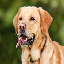

In [40]:
image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))

In [41]:
print(prediction)

dog
